<a href="https://colab.research.google.com/github/AmeerTechsoft/Data-science-project/blob/main/movie_recomendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
from datetime import datetime
from wordcloud import WordCloud

In [ ]:
# Loading in the daset for movies
movies = pd.read_csv('/content/drive/MyDrive/movie_rating_dataset/movies_metadata.csv')

<ipython-input-2-4ae0059fd7b3>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/content/drive/MyDrive/movie_rating_dataset/movies_metadata.csv')


In [ ]:
movies

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
# Loading in the daset for ratings
credits = pd.read_csv('/content/drive/MyDrive/movie_rating_dataset/credits.csv')

In [ ]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [ ]:
# Loading in the daset for ratings
keywords = pd.read_csv('/content/drive/MyDrive/movie_rating_dataset/keywords.csv')

In [ ]:
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


## Data Processing & Cleaning

In [ ]:
# droping unnecessary columns in the movies cartegory
movies = movies.drop(['belongs_to_collection', 'homepage', 'imdb_id', 'poster_path', 'status', 'title', 'video'], axis=1)

In [ ]:
movies = movies.drop([19730, 29503, 35587])

In [ ]:
movies['id'] = movies['id'].astype('int64')

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45463 entries, 0 to 45465
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45463 non-null  object 
 1   budget                45463 non-null  object 
 2   genres                45463 non-null  object 
 3   id                    45463 non-null  int64  
 4   original_language     45452 non-null  object 
 5   original_title        45463 non-null  object 
 6   overview              44509 non-null  object 
 7   popularity            45460 non-null  object 
 8   production_companies  45460 non-null  object 
 9   production_countries  45460 non-null  object 
 10  release_date          45376 non-null  object 
 11  revenue               45460 non-null  float64
 12  runtime               45203 non-null  float64
 13  spoken_languages      45460 non-null  object 
 14  tagline               20412 non-null  object 
 15  vote_average          45

merging the 3 datasets together


In [ ]:
# merging movies with keywords based on id
df = movies.merge(keywords, on='id')

In [ ]:
# merging the movies, keyword and credits based on id
df = df.merge(credits, on='id')

In [ ]:
df.head()


,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,cast,crew
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 46628 non-null  object 
 1   budget                46628 non-null  object 
 2   genres                46628 non-null  object 
 3   id                    46628 non-null  int64  
 4   original_language     46617 non-null  object 
 5   original_title        46628 non-null  object 
 6   overview              45633 non-null  object 
 7   popularity            46624 non-null  object 
 8   production_companies  46624 non-null  object 
 9   production_countries  46624 non-null  object 
 10  release_date          46540 non-null  object 
 11  revenue               46624 non-null  float64
 12  runtime               46360 non-null  float64
 13  spoken_languages      46624 non-null  object 
 14  tagline               20783 non-null  object 
 15  vote_average       

handling empty cells

In [ ]:
#search for missing cells
df.isna().sum()

adult                       0
budget                      0
genres                      0
id                          0
original_language          11
original_title              0
overview                  995
popularity                  4
production_companies        4
production_countries        4
release_date               88
revenue                     4
runtime                   268
spoken_languages            4
tagline                 25845
vote_average                4
vote_count                  4
keywords                    0
cast                        0
crew                        0
dtype: int64

In [ ]:
# handling the empty cells based on their data type from the dataframe info above but only what seams important then drop others
df['overview'] = df['overview'].fillna('')

In [ ]:
df['original_language'] = df['original_language'].fillna('')

In [ ]:
df['tagline'] = df['tagline'].fillna('')

In [ ]:
df['runtime'] = df['runtime'].fillna(0)

In [ ]:
df['budget'] = df['budget'].astype('float64')

In [ ]:
df['popularity'] = df['popularity'].astype('float64')

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

dropping other rows that are not so relivant

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46540 entries, 0 to 46627
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 46540 non-null  object        
 1   budget                46540 non-null  float64       
 2   genres                46540 non-null  object        
 3   id                    46540 non-null  int64         
 4   original_language     46540 non-null  object        
 5   original_title        46540 non-null  object        
 6   overview              46540 non-null  object        
 7   popularity            46540 non-null  float64       
 8   production_companies  46540 non-null  object        
 9   production_countries  46540 non-null  object        
 10  release_date          46540 non-null  datetime64[ns]
 11  revenue               46540 non-null  float64       
 12  runtime               46540 non-null  float64       
 13  spoken_languages     

In [ ]:
df.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,cast,crew
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


Converting the json format data in the dataframe into a string of words seperated by comma

In [ ]:
print(df['cast'])

0        [{'cast_id': 14, 'character': 'Woody (voice)',...
1        [{'cast_id': 1, 'character': 'Alan Parrish', '...
2        [{'cast_id': 2, 'character': 'Max Goldman', 'c...
3        [{'cast_id': 1, 'character': "Savannah 'Vannah...
4        [{'cast_id': 1, 'character': 'George Banks', '...
                               ...                        
46622    [{'cast_id': 1, 'character': 'Sir Robert Hode'...
46624    [{'cast_id': 1002, 'character': 'Sister Angela...
46625    [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...
46626    [{'cast_id': 2, 'character': '', 'credit_id': ...
46627                                                   []
Name: cast, Length: 46540, dtype: object


In [ ]:
# Function to extract teh json looking data
def extract_json(genres_str):
    if pd.isna(genres_str):
        return ""
    else:
        pattern = r"'name':\s+'(.*?)'"
        genres = re.findall(pattern, genres_str)
        return ', '.join(genres)


In [ ]:
# Apply the function to the 'genres' column
df['genres'] = df['genres'].apply(extract_json)

In [ ]:
# Apply the function to the 'production_companies' column
df['production_companies'] = df['production_companies'].apply(extract_json)

In [ ]:
# Apply the function to the 'production_countries' column
df['production_countries'] = df['production_countries'].apply(extract_json)

In [ ]:
# Apply the function to the 'spoken_languages' column
df['spoken_languages'] = df['spoken_languages'].apply(extract_json)

In [ ]:
# Apply the function to the 'keywords' column
df['keywords'] = df['keywords'].apply(extract_json)

In [ ]:
# Apply the function to the 'cast' column
df['cast'] = df['cast'].apply(extract_json)

In [ ]:
# Apply the function to the 'crew' column
df['crew'] = df['crew'].apply(extract_json)

In [ ]:
df.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,cast,crew
0,False,30000000.0,"Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,English,,7.7,5415.0,"jealousy, toy, boy, friendship, friends, rival...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","John Lasseter, Joss Whedon, Andrew Stanton, Jo..."
1,False,65000000.0,"Adventure, Fantasy, Family",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,262797249.0,104.0,"English, Français",Roll the dice and unleash the excitement!,6.9,2413.0,"board game, disappearance, new home, recluse, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","Larry J. Franco, Jonathan Hensleigh, James Hor..."
2,False,0.0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"Warner Bros., Lancaster Gate",United States of America,1995-12-22,0.0,101.0,English,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Howard Deutch, Mark Steven Johnson, Mark Steve..."
3,False,16000000.0,"Comedy, Drama, Romance",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,81452156.0,127.0,English,Friends are the people who let you be yourself...,6.1,34.0,"based on novel, interracial relationship, sing...","Whitney Houston, Angela Bassett, Loretta Devin...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr..."
4,False,0.0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,1995-02-10,76578911.0,106.0,English,Just When His World Is Back To Normal... He's ...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Steve Martin, Diane Keaton, Martin Short, Kimb...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na..."


In [ ]:
df = df[~df['original_title'].duplicated()]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43287 entries, 0 to 43286
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 43287 non-null  object        
 1   budget                43287 non-null  float64       
 2   genres                43287 non-null  object        
 3   id                    43287 non-null  int64         
 4   original_language     43287 non-null  object        
 5   original_title        43287 non-null  object        
 6   overview              43287 non-null  object        
 7   popularity            43287 non-null  float64       
 8   production_companies  43287 non-null  object        
 9   production_countries  43287 non-null  object        
 10  release_date          43287 non-null  datetime64[ns]
 11  revenue               43287 non-null  float64       
 12  runtime               43287 non-null  float64       
 13  spoken_languages

## Exploratory Data Analysis (EDA)

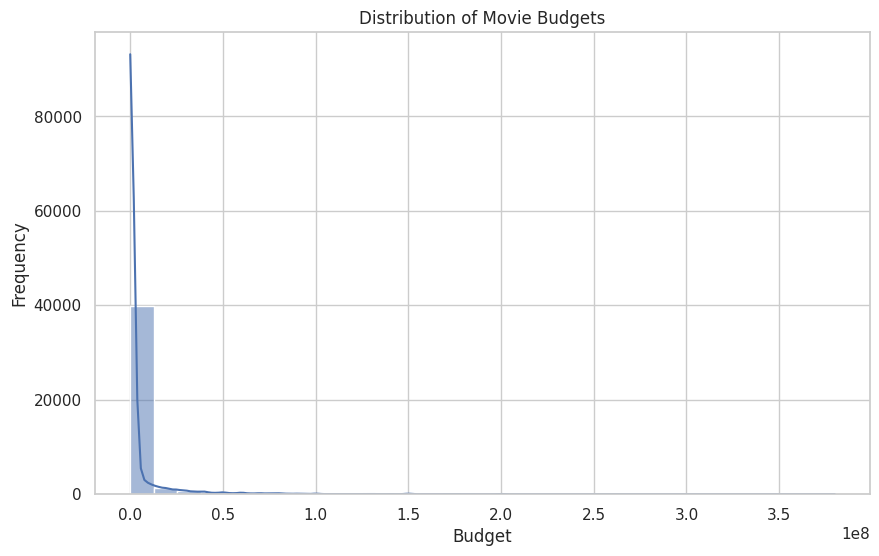

In [ ]:

# Set Seaborn style
sns.set(style="whitegrid")

# Explore the distribution of movie budgets
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='budget', bins=30, kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

# You can continue with more visualizations for recommendation analysis, interactive visualizations, and interpretation as needed.


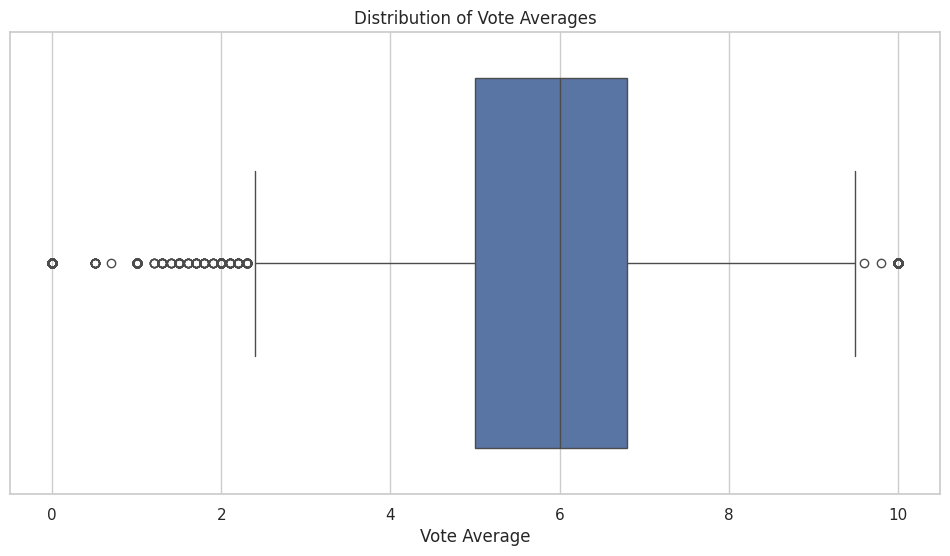

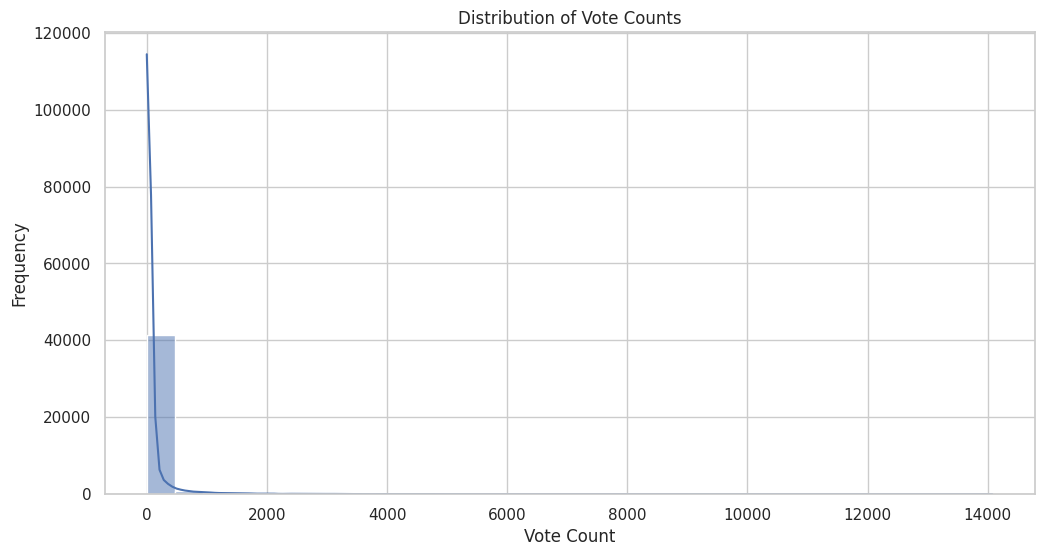

In [ ]:
# Visualize the distribution of vote averages and counts
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='vote_average')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='vote_count', bins=30, kde=True)
plt.title('Distribution of Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()



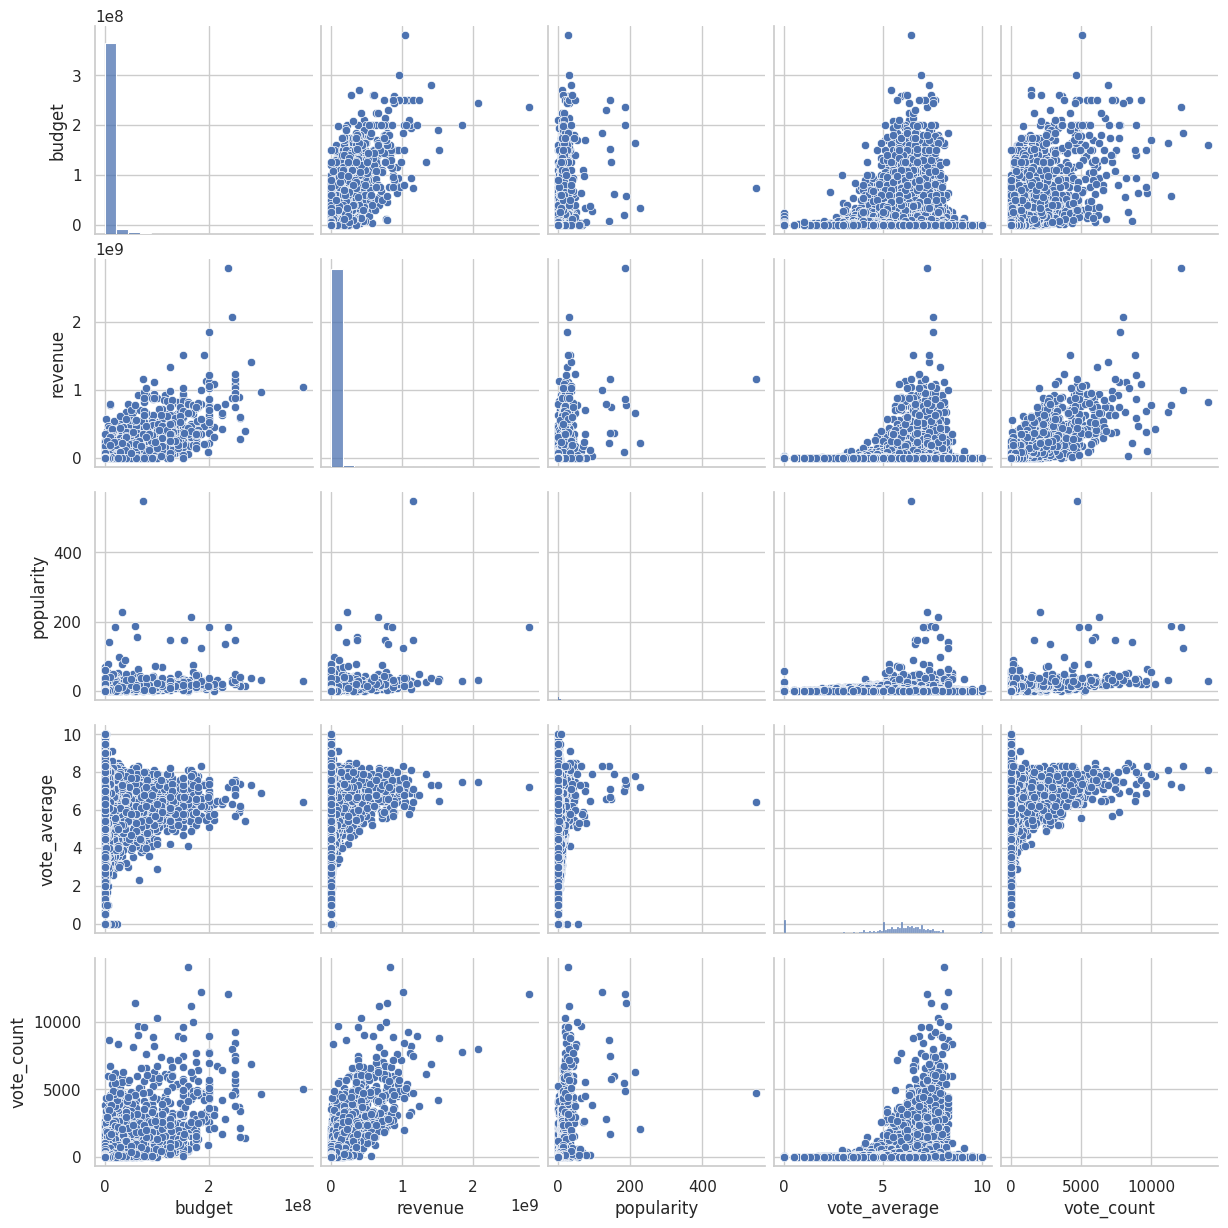

In [ ]:
# Plot the relationship between numerical features
sns.pairplot(df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']])
plt.show()

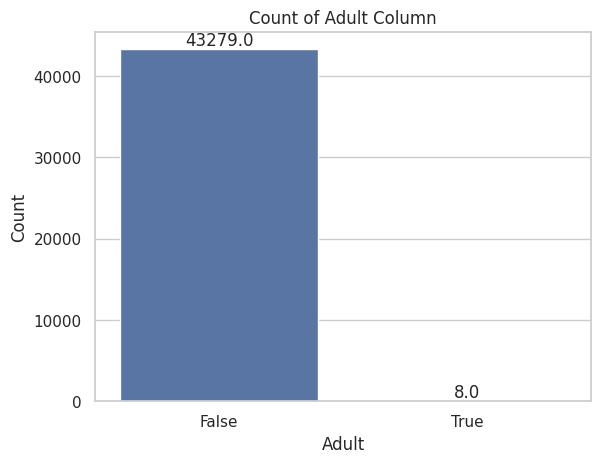

In [ ]:
# Plot the count of the 'adult' column
ax = sns.countplot(x='adult', data=df)
plt.xlabel('Adult')
plt.ylabel('Count')
plt.title('Count of Adult Column')

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

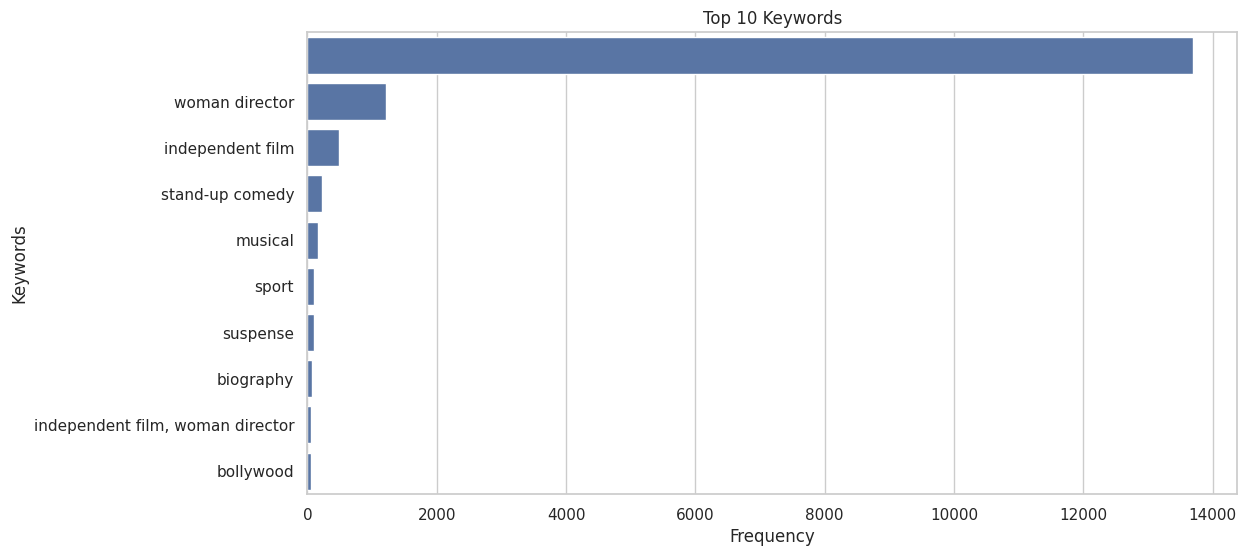

In [ ]:
# Visualize the most common keywords, production companies, and cast members
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='keywords', order=df['keywords'].value_counts().index[:10])
plt.title('Top 10 Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.show()



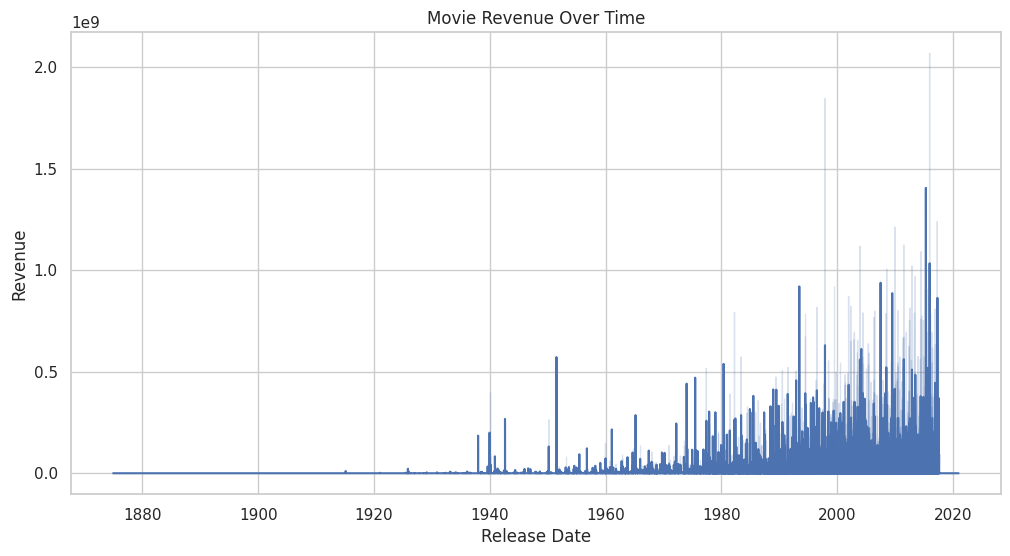

In [ ]:
# Time series analysis of movie releases over the years
df['release_date'] = pd.to_datetime(df['release_date'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_date', y='revenue')
plt.title('Movie Revenue Over Time')
plt.xlabel('Release Date')
plt.ylabel('Revenue')
plt.show()

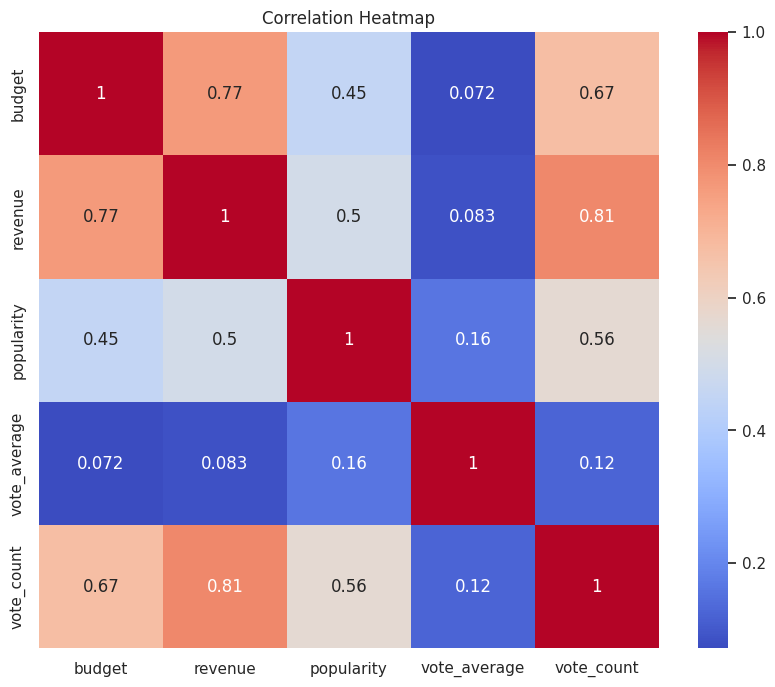

In [ ]:
# Heatmap to show relationships between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[['budget', 'revenue', 'popularity', 'vote_average', 'vote_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

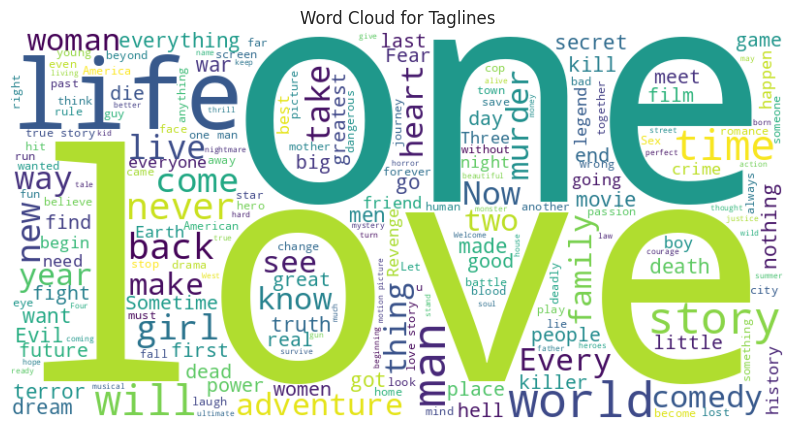

In [ ]:
# Word Cloud for Taglines
taglines = ' '.join(df['tagline'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(taglines)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Taglines')
plt.axis('off')
plt.show()

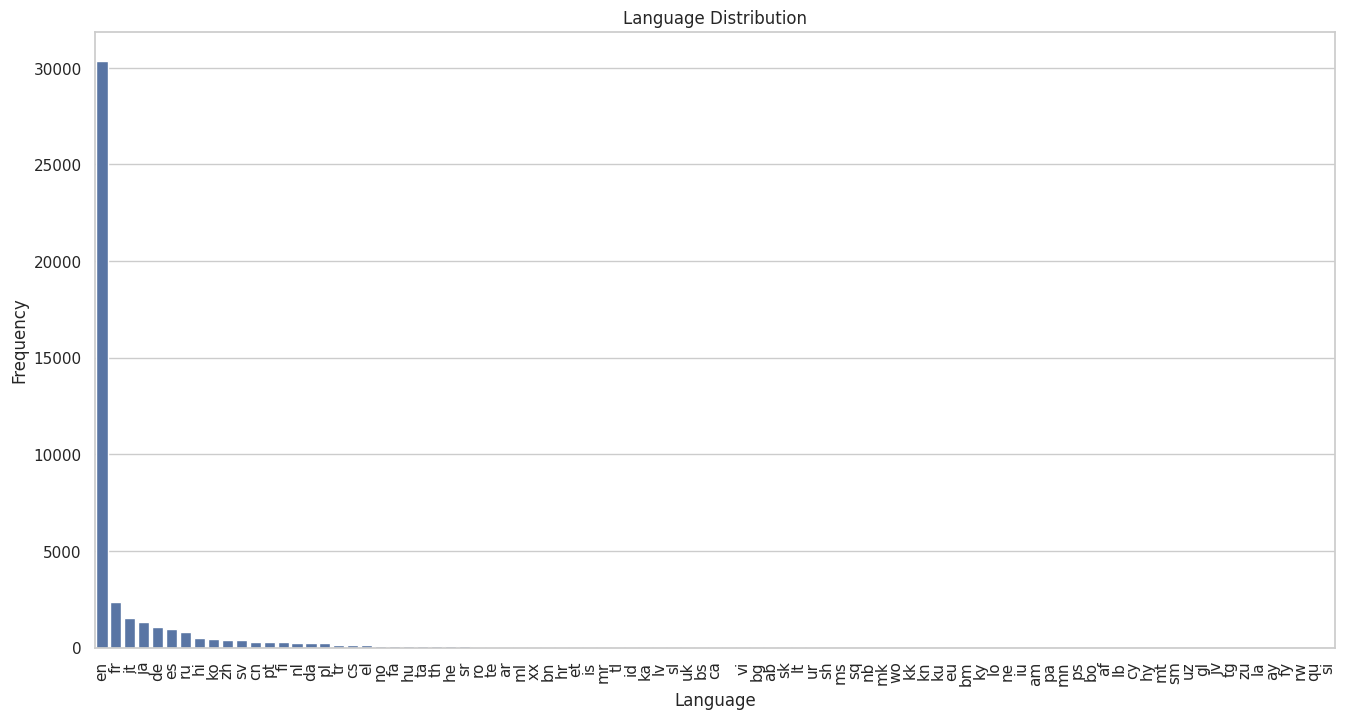

In [ ]:

# Language Distribution
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='original_language', order=df['original_language'].value_counts().index)
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


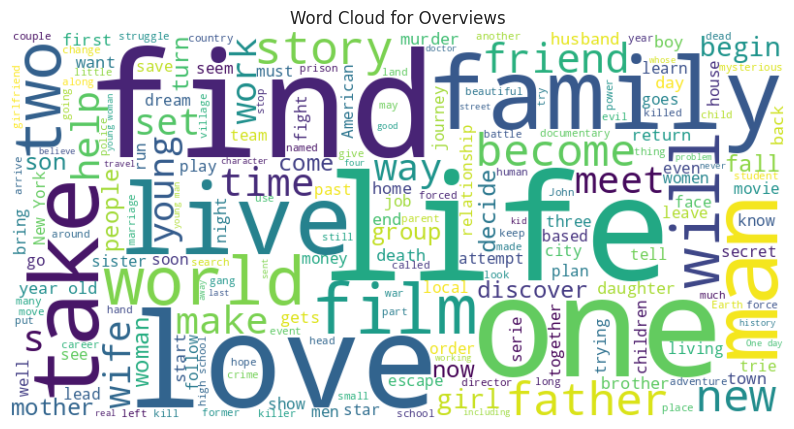

In [ ]:
# Word Cloud for Overviews
overviews = ' '.join(df['overview'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Overviews')
plt.axis('off')
plt.show()

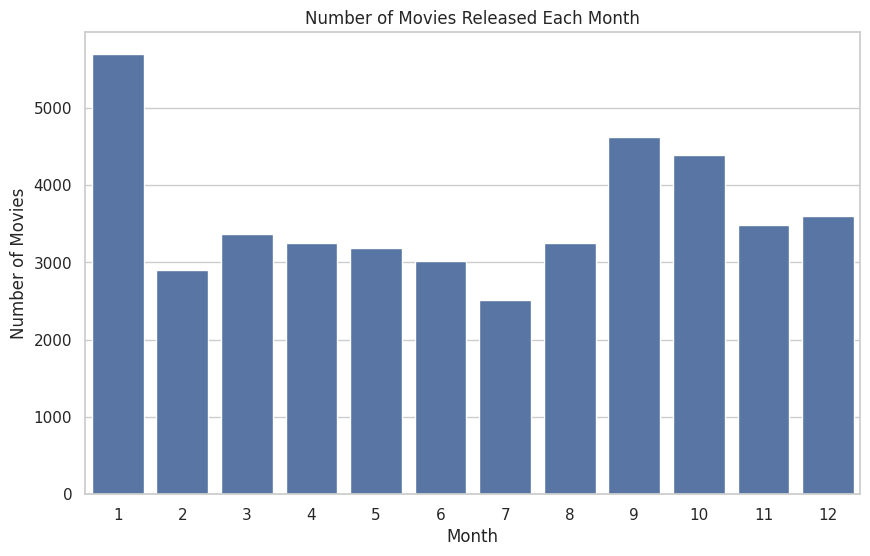

In [ ]:
# Release Month Analysis
df['release_month'] = df['release_date'].dt.month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='release_month')
plt.title('Number of Movies Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.show()

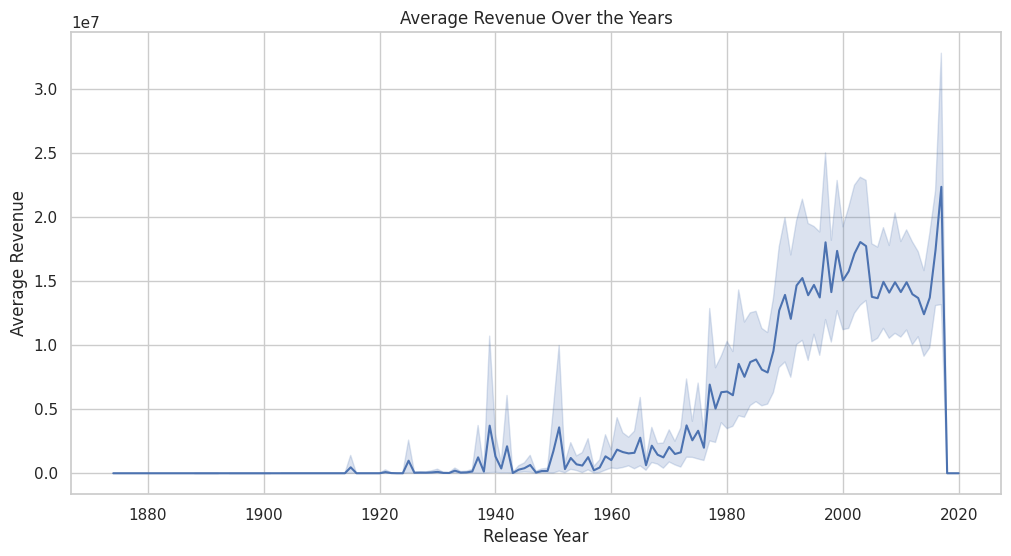

In [ ]:
# Average Revenue Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df['release_date'].dt.year, y='revenue', estimator=np.mean)
plt.title('Average Revenue Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Revenue')
plt.show()

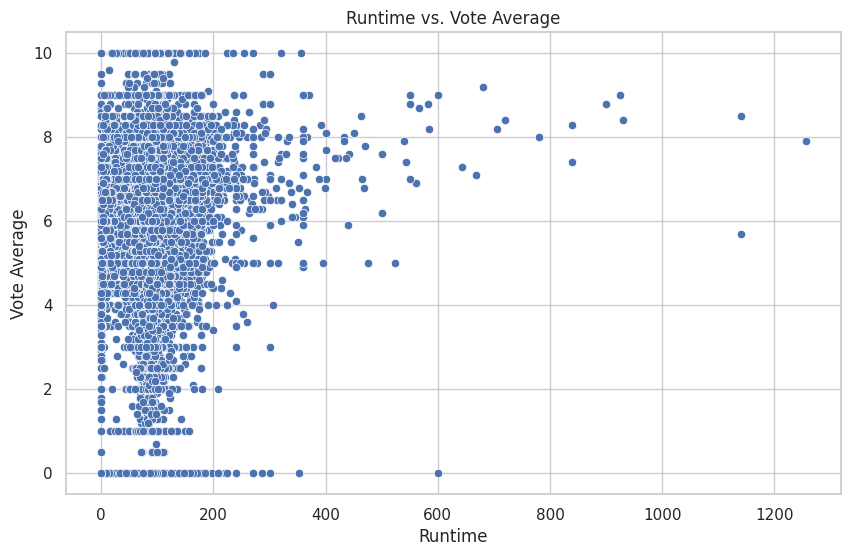

In [ ]:
# Runtime vs. Vote Average
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='runtime', y='vote_average')
plt.title('Runtime vs. Vote Average')
plt.xlabel('Runtime')
plt.ylabel('Vote Average')
plt.show()

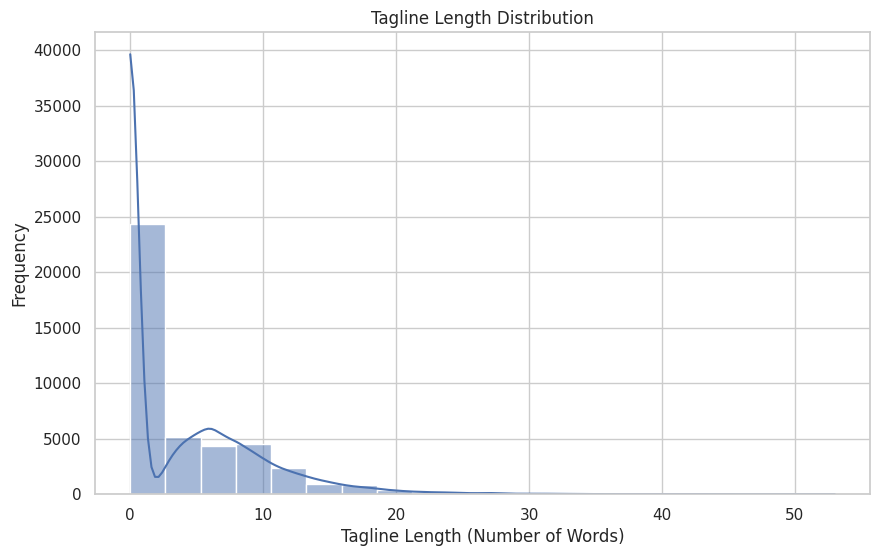

In [ ]:
# Tagline Length Distribution
df['tagline_length'] = df['tagline'].str.split().apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tagline_length', bins=20, kde=True)
plt.title('Tagline Length Distribution')
plt.xlabel('Tagline Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

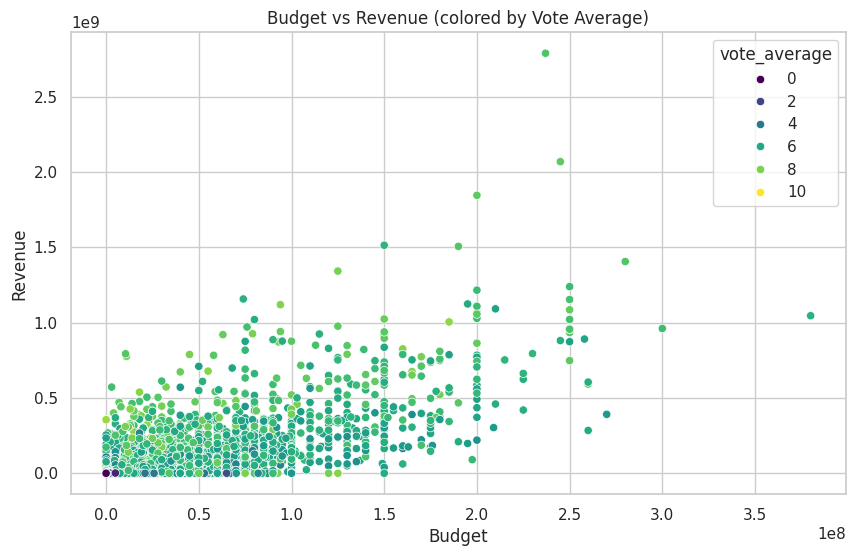

In [ ]:
# Comparing budget and revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', hue='vote_average', palette='viridis')
plt.title('Budget vs Revenue (colored by Vote Average)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


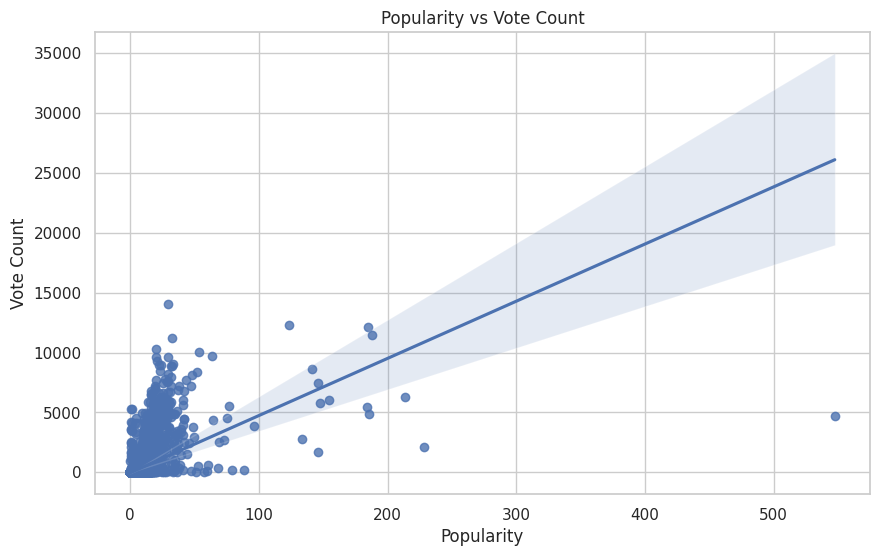

In [ ]:

# Comparing popularity and vote_count
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='popularity', y='vote_count')
plt.title('Popularity vs Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.show()

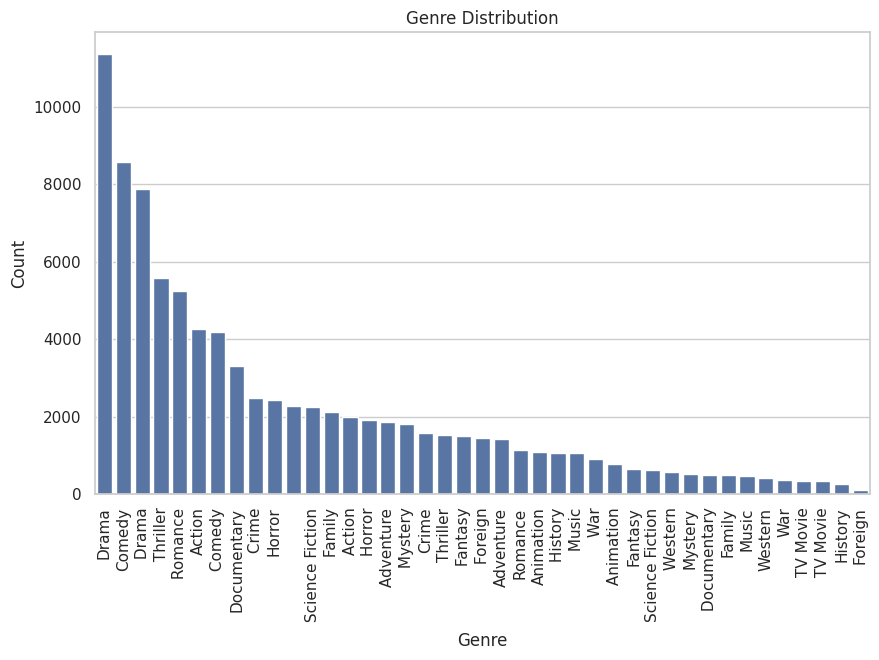

In [ ]:
# Comparing genres
genre_counts = df['genres'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43287 entries, 0 to 43286
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 43287 non-null  object        
 1   budget                43287 non-null  float64       
 2   genres                43287 non-null  object        
 3   id                    43287 non-null  int64         
 4   original_language     43287 non-null  object        
 5   original_title        43287 non-null  object        
 6   overview              43287 non-null  object        
 7   popularity            43287 non-null  float64       
 8   production_companies  43287 non-null  object        
 9   production_countries  43287 non-null  object        
 10  release_date          43287 non-null  datetime64[ns]
 11  revenue               43287 non-null  float64       
 12  runtime               43287 non-null  float64       
 13  spoken_languages

## Deep learning model using Tensorflow

In [ ]:
# Loading in the daset for ratings
ratings_df = pd.read_csv('/content/drive/MyDrive/movie_rating_dataset/ratings_small.csv')

In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
from datetime import datetime

# Convert timestamp to datetime
ratings_df['date'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Merge ratings_df with df on movieId and id
ratings_df = ratings_df.merge(df[['id', 'original_title', 'genres', 'overview']],
                              left_on='movieId', right_on='id', how='left')

# Drop rows with missing movie information
ratings_df = ratings_df.dropna(subset=['id'])

# Drop unnecessary columns
ratings_df.drop(['timestamp', 'id'], axis=1, inplace=True)

# Reset index
ratings_df.reset_index(drop=True, inplace=True)


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43322 entries, 0 to 43321
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   userId          43322 non-null  int64         
 1   movieId         43322 non-null  int64         
 2   rating          43322 non-null  float64       
 3   date            43322 non-null  datetime64[ns]
 4   original_title  43322 non-null  object        
 5   genres          43322 non-null  object        
 6   overview        43322 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
# Select columns and rename 'id' to 'movieId'
movies_df = df[['id', 'original_title']].rename(columns={'id': 'movieId'})

In [ ]:
movies_df.head()

,movieId,original_title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [ ]:
!pip install tensorflow-recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 1.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_recommenders as tfrs
from typing import Dict, Text

In [ ]:
# Convert userId to string
ratings_df['userId'] = ratings_df['userId'].astype(str)

# Create datasets
ratings = tf.data.Dataset.from_tensor_slices({
    'original_title': ratings_df['original_title'].values,
    'userId': ratings_df['userId'].values,
    'rating': ratings_df['rating'].astype(float).values
})

movies = tf.data.Dataset.from_tensor_slices(movies_df['original_title'].values)

# Shuffle ratings dataset
ratings = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

# Split into train and test datasets
train = ratings.take(40_000)
test = ratings.skip(40_000).take(3000)

print('Total Data: {}'.format(len(ratings)))


Total Data: 43322


In [ ]:
train

<_TakeDataset element_spec={'original_title': TensorSpec(shape=(), dtype=tf.string, name=None), 'userId': TensorSpec(shape=(), dtype=tf.string, name=None), 'rating': TensorSpec(shape=(), dtype=tf.float64, name=None)}>

In [ ]:
# Batch movie titles and user IDs
movie_titles = movies.batch(1000)
user_ids = ratings.batch(1000).map(lambda x: x['userId'])

# Extract unique movie titles and user IDs
unique_movie_titles = np.unique(np.concatenate(list(movie_titles)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

# Print unique counts
print('Unique Movies: {}'.format(len(unique_movie_titles)))
print('Unique Users: {}'.format(len(unique_user_ids)))


Unique Movies: 43287
Unique Users: 671


In [ ]:
class MovieModel(tfrs.models.Model):

  def __init__(self, rating_weight: float, retrieval_weight: float) -> None:
    # We take the loss weights in the constructor: this allows us to instantiate
    # several model objects with different loss weights.

    super().__init__()

    embedding_dimension = 64

    # User and movie models.
    self.movie_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_movie_titles, mask_token=None),
      tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
    ])
    self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
      tf.keras.layers.StringLookup(
        vocabulary=unique_user_ids, mask_token=None),
      tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
    ])

    # A small model to take in user and movie embeddings and predict ratings.
    # We can make this as complicated as we want as long as we output a scalar
    # as our prediction.
    self.rating_model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
    ])

    # The tasks.
    self.rating_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()],
    )
    self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
        metrics=tfrs.metrics.FactorizedTopK(
            candidates=movies.batch(128).map(self.movie_model)
        )
    )

    # The loss weights.
    self.rating_weight = rating_weight
    self.retrieval_weight = retrieval_weight

  def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
    # We pick out the user features and pass them into the user model.
    user_embeddings = self.user_model(features["userId"])
    # And pick out the movie features and pass them into the movie model.
    movie_embeddings = self.movie_model(features["original_title"])

    return (
        user_embeddings,
        movie_embeddings,
        # We apply the multi-layered rating model to a concatentation of
        # user and movie embeddings.
        self.rating_model(
            tf.concat([user_embeddings, movie_embeddings], axis=1)
        ),
    )

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:

    ratings = features.pop("rating")

    user_embeddings, movie_embeddings, rating_predictions = self(features)

    # We compute the loss for each task.
    rating_loss = self.rating_task(
        labels=ratings,
        predictions=rating_predictions,
    )
    retrieval_loss = self.retrieval_task(user_embeddings, movie_embeddings)

    # And combine them using the loss weights.
    return (self.rating_weight * rating_loss
            + self.retrieval_weight * retrieval_loss)

In [ ]:
# Create the MovieModel instance
model = MovieModel(rating_weight=1.0, retrieval_weight=1.0,)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

# Cache train and test datasets
cached_train = train.shuffle(100_000).batch(1000).cache()
cached_test = test.batch(1000).cache()

# Fit the model
model.fit(cached_train, epochs=10)


Epoch 1/10
40/40 [==============================] - 210s 5s/step - root_mean_squared_error: 1.5075 - factorized_top_k/top_1_categorical_accuracy: 2.2500e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0072 - factorized_top_k/top_10_categorical_accuracy: 0.0185 - factorized_top_k/top_50_categorical_accuracy: 0.1088 - factorized_top_k/top_100_categorical_accuracy: 0.1766 - loss: 6799.5331 - regularization_loss: 0.0000e+00 - total_loss: 6799.5331
Epoch 2/10
40/40 [==============================] - 207s 5s/step - root_mean_squared_error: 0.9886 - factorized_top_k/top_1_categorical_accuracy: 7.5000e-04 - factorized_top_k/top_5_categorical_accuracy: 0.0202 - factorized_top_k/top_10_categorical_accuracy: 0.0461 - factorized_top_k/top_50_categorical_accuracy: 0.2040 - factorized_top_k/top_100_categorical_accuracy: 0.3194 - loss: 6431.8230 - regularization_loss: 0.0000e+00 - total_loss: 6431.8230
Epoch 3/10
40/40 [==============================] - 207s 5s/step - root_mean_squared_error: 0.

In [ ]:
cached_test = test.batch(1000).cache()

In [ ]:
metrics = model.evaluate(cached_test, return_dict=True)

print(f"\nRetrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}")

3/3 [==============================] - 16s 5s/step - root_mean_squared_error: 0.9143 - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 3.3333e-04 - factorized_top_k/top_10_categorical_accuracy: 0.0017 - factorized_top_k/top_50_categorical_accuracy: 0.0637 - factorized_top_k/top_100_categorical_accuracy: 0.1460 - loss: 7230.2218 - regularization_loss: 0.0000e+00 - total_loss: 7230.2218

Retrieval top-100 accuracy: 0.146
Ranking RMSE: 0.914


In [ ]:
# Save the model weights
model.save_weights('movie recomendation tensor.h5')

## Model prediction and Testing

In [ ]:
def movie_predictor(user, top_n=3):
    # A function used to recommend movies out of the entire movies dataset.
    index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)

    # Index the dataset.
    index.index_from_dataset(
        tf.data.Dataset.zip((movies.batch(100), movies.batch(100).map(model.movie_model)))
    )

    # Get recommendations.
    _, titles = index(tf.constant([str(user)]))

    print('Top {} recommendations for user {}:\n'.format(top_n, user))
    for i, title in enumerate(titles[0, :top_n].numpy()):
        print('{}. {}'.format(i+1, title.decode("utf-8")))


def rating_predictor(user, movie):
    trained_movie_embeddings, trained_user_embeddings, predicted_rating = model({
        "userId": np.array([str(user)]),
        "original_title": np.array([movie])
    })
    print("Predicted rating for {}: {}".format(movie, predicted_rating.numpy()[0][0]))


In [ ]:
movie_predictor(410, 10)

Top 10 recommendations for user 410:

1. Trois couleurs : Rouge
2. Bang Boom Bang - Ein todsicheres Ding
3. Syriana
4. The Million Dollar Hotel
5. Terminator 3: Rise of the Machines
6. Monsoon Wedding
7. La belle et la bête
8. The 39 Steps
9. Once Were Warriors
10. Halbe Treppe


In [ ]:
rating_predictor(410, ' Bang Boom Bang - Ein todsicheres Ding')

Predicted rating for  Bang Boom Bang - Ein todsicheres Ding: 3.3946750164031982


In [ ]:
ratings_df[ratings_df['userId'] == '410']

,userId,movieId,rating,date,original_title,genres,overview
24894,410,110,5.0,2015-06-11 21:25:34,Trois couleurs : Rouge,"Drama, Mystery, Romance",Red This is the third film from the trilogy by...
24895,410,165,3.0,2015-06-11 21:26:01,Back to the Future Part II,"Adventure, Comedy, Family, Science Fiction",Marty and Doc are at it again in this wacky se...
24896,410,231,3.0,2015-06-11 21:26:14,Syriana,"Drama, Thriller",The Middle Eastern oil industry is the backdro...
24897,410,260,4.5,2015-06-11 21:25:11,The 39 Steps,"Action, Thriller, Mystery","While on vacation in London, Canadian Richard ..."
24898,410,296,1.0,2015-06-11 21:25:26,Terminator 3: Rise of the Machines,"Action, Thriller, Science Fiction",It's been 10 years since John Connor saved Ear...
24899,410,316,4.5,2015-06-11 21:26:17,Halbe Treppe,"Comedy, Drama",In the style of a documentary this tragic come...
24900,410,318,5.0,2015-06-11 21:25:15,The Million Dollar Hotel,"Drama, Thriller",The Million Dollar Hotel starts with a jump fr...
24901,410,344,3.0,2015-06-11 21:25:58,Bang Boom Bang - Ein todsicheres Ding,"Crime, Action, Comedy",Bank robber Kelle Grabowski escapes from priso...
24902,410,377,4.5,2015-06-11 21:25:56,A Nightmare on Elm Street,Horror,Teenagers in a small town are dropping like fl...
24903,410,380,4.0,2015-06-11 21:26:03,Rain Man,Drama,Selfish yuppie Charlie Babbitt's father left a...
